# Estimador de Màxima Verosìmil

**Ejemplo 1.**  
Lanzamos una moneda 100 veces, sabiendo que se obtienen 55 soles.  
Encontrar el EMV para la probabilidad \(p\) de obtener sol en un sólo lanzamiento.

Si \(X\): el número de soles que se obtiene al lanzar una moneda,  
se tiene que \(X \sim Bin(100,p)\), es decir

$$
f(55 \, \text{soles};p) = \binom{100}{55}p^{55}(1-p)^{100-55}
$$

In [6]:
from scipy.stats import binom
import numpy as np 
import sympy #para el calculo simbòlico y algebraico 
from sympy.abc import x # importa la variable simbolica x


# Vamos a deinir a p como una variable simbolica positiva 
p = sympy.symbols('p', positiva =True)
# definimos f 

f = p**55 * (1-p) **(100-55)
# DErivamos f con respecto a p 
df = sympy.diff(f,p)
# Igualamos la derivada a cero y despejamos p
phat = sympy.solve(df,p)[0]

print (f'El estimador de maximaverosimilitud para p es:{phat}')


El estimador de maximaverosimilitud para p es:0


In [7]:
# Veamos otro Ejemplo 

#simularemos una muestra de tamaño 100

r = binom.rvs(n=1, p=0.7, size=100)
r

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [8]:
f = p**x * (1-p)**(1-x)
J = np.prod([f.subs(x,i) for i in r])
logJ = sympy.expand_log(sympy.log(J))
phat = sympy.solve(sympy.diff(logJ,p),p)[0]
print ("El estimador de maxima verosimilitud para p es ",phat)
# Obtenemos un valor cercano a  0.7

El estimador de maxima verosimilitud para p es  73/100


**Ejercicio:** El tiempo de retardo para pacientes con enfermedad coronaria potencial se define como la duración entre el comienzo de un síntoma agudo cardiovascular y la llegada a la unidad de emergencia.
Se supone que el tiempo de retardo sigue una distribución exponencial con parámetro $\theta $.
Se registraron los tiempos de retardo (en minutos) en la clínica para los primeros 20 pacientes:
$$ 525, \ 719, \ 2880, \ 150, \ 30, \ 251, \ 45, \ 858, \ 15, \ 47, \ 90, \ 56, \ 68, \ 6, \ 189, \ 180, \ 60, \ 60, \ 294, \ 747 $$
- Encuentra un estimador por el método de momentos para la media de la distribución (exponencial).
- Encuentra el valor del estimador con los datos dados.

In [9]:
import sympy as sp
import numpy as np

# 1. Definimos las  variables

theta, x = sp.symbols('theta x', positive=True)
n = 20  # número de datos


# Datos

datos = np.array([525, 719, 2880, 150, 30, 251, 45, 858, 15, 47,
                  90, 56, 68, 6, 189, 180, 60, 60, 294, 747])


# Definimos  f(x; theta)

f = (1/theta) * sp.exp(-x/theta)


# Armamos la función de verosimilitud (producto de f para cada dato)

# Sustituimos cada valor de x en f(x; theta) y tomamos el producto
L = sp.prod([f.subs(x, xi) for xi in datos])  # L(theta)


# Log-verosimilitud

logL = sp.expand_log(sp.log(L), force=True)  # log L(theta)


# Derivamos log-verosimilitud con respecto a theta

dlogL = sp.diff(logL, theta)

# Resolver d(logL)/dtheta = 0

theta_hat = sp.solve(dlogL, theta)[0]

# Mostramos resultado simbólico y numérico

print(" Estimador simbólico de máxima verosimilitud para θ ")
sp.pprint(theta_hat)

#Calculamos valor numérico

valor_theta = theta_hat.evalf()
print("\nEstimador de MLE con los datos:", float(valor_theta))



 Estimador simbólico de máxima verosimilitud para θ 
727/2

Estimador de MLE con los datos: 363.5


**Ejercicio (Pyton)**. Suponga que la vida util de los focos de cierta marca, se modela mediante una distribución expoencial de parametro  θ  (desconocido). Probamos 5 focos y encontramos que tienen una vida útil de  2,3,1,3  y  5  años, respectivamente. ¿Cuál es el MLE para  θ ?

In [10]:
import sympy as sp
import numpy as np


# definimos 

theta, x = sp.symbols('theta x', positive=True)


# Datos observados
datos = [2, 3, 1, 3, 5]
n = len(datos)


#  Definir f(x; theta)

f = (1/theta) * sp.exp(-x/theta)

#  Armamos la verosimilitud L(theta)

L = sp.prod([f.subs(x, xi) for xi in datos])


# Log-verosimilitud

logL = sp.expand_log(sp.log(L), force=True)

# 6. Derivada de log-verosimilitud

dlogL = sp.diff(logL, theta)

# Resolvemos d(logL)/dtheta = 0

theta_mle = sp.solve(dlogL, theta)[0]

#  Evaluamos los datos

valor_mle = theta_mle.evalf()

print(" Estimador simbólico de MLE para θ ")
sp.pprint(theta_mle)

print(f"\nValor numérico del estimador MLE: θ̂ = {float(valor_mle):.4f} años")


 Estimador simbólico de MLE para θ 
14/5

Valor numérico del estimador MLE: θ̂ = 2.8000 años


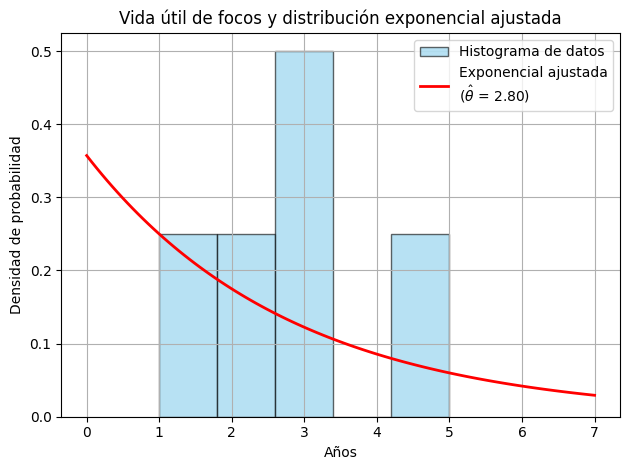

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

datos = np.array([2, 3, 1, 3, 5])
n = len(datos)
theta_hat = np.mean(datos)  # MLE de theta


#  Creamos histograma

# Densidad = True para normalizar el histograma
plt.hist(datos, bins=5, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Histograma de datos')


#  Curva de la exponencial ajustada

x = np.linspace(0, max(datos)+2, 100)
pdf = expon.pdf(x, scale=theta_hat)  # loc=0 por defecto

plt.plot(x, pdf, 'r-', lw=2, label=f'Exponencial ajustada\n($\\hat{{\\theta}}$ = {theta_hat:.2f})')

# gráfico
plt.title('Vida útil de focos y distribución exponencial ajustada')
plt.xlabel('Años')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid(True)
plt.tight_layout()

# =======================
# 5. Mostrar
# =======================
plt.show()


Sea $(x_1,...,x_n)$ m.a. , i.e. , sin va.i.i.d con $x_i\sim \mathbb{B}er(p)$

Hallar el estimado $\hat{p}$ por maxima verosimilitud

$$\begin{align*}f(x;p) = p^x(1-p)^{1-x}\end{align*}$$

$$
\begin{align*}
\text{\textcircled{1}} \qquad L(x_1,...,x_n;p) &= f(x_1;p)...f(x_n;p) \\
&= \prod_{i=1}^n f(x_i;p) \\
&= p^{x_1}(1-p)^{1-x_1}...p^{x_n}(1-p)^{1-x_n} \\
&= p^{x_1+...+x_n}(1-p)^{(1-x_1)+...+(1-x_n)} \\
&= p^{\sum^n_{i=1}x_i}(1-p)^{\sum^n_{i=1}(1-x_i)} \\
&= p^{\sum^n_{i=1}x_i}(1-p)^{n-\sum^n_{i=1}x_i}
\end{align*}
$$




$$
\begin{align*}
\text{\textcircled{2}}\qquad \ln(L(x_1,...,x_n;p)) = \ln(p^{\sum^n_{i=1}x_i}(1-p)^{n-\sum^n_{i=1}x_i})\\
= \ln(p^{\sum xi}) + \ln ((1-p)^{n-\sum xi})\\
= \underbrace{\sum xi \ln(p) + (n-\sum xi) \ln (1-p)}_{\circledast}
\end{align*}
$$

$$ 
\text{\textcircled{3}} \qquad \frac{d\ln L(x;p)}{dp} = \frac{d\circledast}{dp} = \frac{d(\sum xi \ln(p))}{dp} + \frac{d(n-\sum xi \ln (1-p))}{dp}\\
= \frac{\sum xi}{p} + \frac{n - \sum xi}{1-p} (-1) = 0\\
\Rightarrow \frac{(1-p)\sum xi-p(n - \sum xi)}{p(1-p)} = 0
$$

y despejando a p 

$$
\Rightarrow \sum xi - p \sum xi - pn + p\sum xi = 0\\
\Rightarrow \sum xi - pn = 0\\
\Rightarrow pn = \sum xi \Rightarrow p = \frac{\sum xi}{n} = \bar{x}
$$

Por lo tanto 

$$
\hat{p} = \bar{x} \rightarrow p
$$

Estimadores $\rightarrow$ insesgador: $\mathbb{E}[\hat{\theta}]=\theta$

EMV

momentos

Propiedad de invarianza: Si $\hat{\theta}$ es EMV de $\theta$ y nos interesa estimar una función de $\theta$, digamos $T(\theta)$

$\widehat{T(\theta)}=T(\hat{\theta})$

Si $\hat{\theta}=\bar{x}$ es EMV de $\theta$

$\Rightarrow T(\theta) = \theta^2$

$\Rightarrow \widehat{T(\theta)} = (\bar{x})^2$

Si $x_1,...,x_n$ es una m.a. exp $(\theta)$

$$
\begin{equation*}
\left.
\begin{aligned}
\hat{\theta}_1 = & \quad x_1 \\
\hat{\theta}^2 = & \quad \frac{x_1 + x_2}{2} \\
\hat{\theta}_3 = & \quad \frac{x_1 + 2x_2}{3}
\end{aligned}
\right\}\text{Estimador} \quad \underline{"Minima \quad Varianza"}
\end{equation*}
$$


$\text{\underline{Error \quad cuadratico \quad medio}}$

ECM $(\hat{\theta}) = \mathbb{E}[(\underbrace{\hat{\theta}-\theta)^2}_{\text{dif entre el estimador y el valor verdadero}}]$

ECM $(\hat{\theta}) = Var(\hat{\theta}) + (\underbrace{\mathbb{E}[\hat{\theta}] - \theta}_{\text{Sesgo}})$ 

$\cdot \text{Si es 0} \Rightarrow \hat{\theta} \quad \text{es insesgado}$

$\cdot \text{Si es} \neq 0 \Rightarrow \hat{\theta} \quad \text{es sesgado}$

Ejemplo. Sea $x_1,...,x_n$ una m.a. Poisson $(\lambda)$

$f(x_i;\lambda) = e^{-\lambda}\frac{\lambda^{x_i}}{x_i!} , \quad x_i = 0,1,...$

$\text{\textcircled{1}}$ Encontrar EMV

$\text{\textcircled{2}}$ ¿Es insesgado?

$\text{\textcircled{3}}$ E.C.M.

$$
\begin{align*}
\text{\textcircled{1}}\qquad L(x_1,...,x_n;\theta) = \Pi^n_{i=1} \quad e^{-\theta} \frac{\theta^{xi}}{x_i !} = \quad \frac{e^{-n\theta}\theta^{\sum xi}}{x_1!,...,x_n!}\\
\ln L(x_1,...,x_n;\theta) = \ln(e^{-n\theta}\theta^{\sum xi}) - \ln(x_1!,...,x_n!)\\
= -n\theta + \sum x_i\ln(\theta) - \sum \ln(x_i!)\\
\Rightarrow \frac{d\ln L(x_i;\theta)}{d\theta} = -n + \frac{2x_i}{\theta} = 0\\
\Rightarrow \frac{\sum x_i}{\theta} = n \Rightarrow \frac{\sum x_i}{n} = \theta \Rightarrow \hat{\theta} = \bar{x}\\
\end{align*}
$$

$$\text{\textcircled{2}} \quad \mathbb{E}[\hat{\theta}] = \mathbb{E}[\frac{\sum x_i}{n}] = \frac{1}{n} \mathbb{E}[\sum x_i] = \frac{1}{n} \sum \mathbb{E}[x_i] = \frac{1}{n} \sum \theta = \frac{n\theta}{n} = \theta$$

$$\begin{align*}
\text{\textcircled{3}} \qquad ECM(\hat{\theta}) = Var(\hat{\theta}) =Var(\sum \frac{x_i}{n})\\
= \frac{1}{n^2} Var(\sum x_i) = \frac{1}{n^2} \sum Var(x_i)\\
= \frac{1}{n^2} \sum \theta = \frac{n\theta}{n^2} = \frac{\theta}{n}\\
EMC(\hat{\theta}) = \frac{\theta}{n}\\
\text{disminuye a medida que tengo más datos}
\end{align*}$$


![Gráfico de distribución mostrando sesgo positivo y negativo](Sesgo.png)

X v.a con momento de orden 2 finito

$g(u) = \mathbb{E}[(x-u)^2] \leftarrow ECM$

$g(u)$ se mínimiza cuando $\mathbb{E}[x]=u$

$\Rightarrow Var(x) \leq \mathbb{E}[(x-u)^2]$

## Estimador por Método de los Momentos

**Ejemplo:** Si $x_1,x_2,...,x_n \sim EXP(\lambda)$, la media teórica es $E[X]=1/\lambda$

Por el método de momentos:

$\hat{\lambda}_{MM}=\frac{1}{\bar{X}}$

In [12]:
import numpy as np

# Generamos una muestra de una distribución exponencial con lambda=2
np.random.seed(0)
lam_true = 2
n = 100
sample = np.random.exponential(1/lam_true, n)

# Estimador método de momentos
lambda_MM = 1 / np.mean(sample)

print(f"λ verdadero = {lam_true}")
print(f"Estimación método de momentos λ̂_MM = {lambda_MM:.4f}")

λ verdadero = 2
Estimación método de momentos λ̂_MM = 2.1771


## Estimador por Máxima Verosimilitud (EMV)

**Ejemplo:** Para la distribución $X_i \sim Exp(\lambda)$, la función de verosimilitud es:

$$ L(\lambda)=\lambda^n e^{-\lambda\sum x_i}$$

Maximizando:

$$\hat{\lambda}_{EMV}=\frac{n}{\sum X_i}=\frac{1}{\bar{X}} $$

In [13]:
# Estimador EMV para distribución exponencial
lambda_EMV = 1 / np.mean(sample)
# imprimimos resultado 
print(f"Estimación EMV λ̂_EMV = {lambda_EMV:.4f}")

Estimación EMV λ̂_EMV = 2.1771


## Insesgadez

El estimador $\bar{X}$ es insesgado para la media $\mu$

La varianza muestral $s^2=\frac{1}{n-1}\sum(X_i-\bar{X})^2$ es insesgada para $\sigma^2$

In [14]:
# Simulación para verificar insesgadez
np.random.seed(1)
mu, sigma = 50, 10
n = 30
Nsim = 10000

medias = []
vars_muestrales = []

for _ in range(Nsim): # Simulaciones
    muestra = np.random.normal(mu, sigma, n)
    medias.append(np.mean(muestra))
    vars_muestrales.append(np.var(muestra, ddof=1))  # ddof=1 para insesgado

print(f"Media teórica de medias: {np.mean(medias):.2f} ≈ {mu}")
print(f"Media teórica de varianzas: {np.mean(vars_muestrales):.2f} ≈ {sigma**2}")


Media teórica de medias: 50.02 ≈ 50
Media teórica de varianzas: 99.83 ≈ 100


## Consistencia

Un estimador es consistente si converge en probabilidad al valor real cuando $n\rightarrow\infty$

In [15]:
np.random.seed(2) # Reproducibilidad
mu, sigma = 10, 2 # Parámetros reales
sizes = [10, 50, 200, 1000] # Tamaños de muestra

for n in sizes: # Diferentes tamaños de muestra
    sample = np.random.normal(mu, sigma, n)
    est_mu = np.mean(sample)
    print(f"n={n:<4} -> media muestral = {est_mu:.3f}")

n=10   -> media muestral = 8.737
n=50   -> media muestral = 9.978
n=200  -> media muestral = 10.024
n=1000 -> media muestral = 9.906


## Eficiencia
**Ejemplo:**
Entre dos estimadores insesgador de $\mu$, el más eficiente tiene menor varianza.

Comparamos:

* $\bar{X}$: media de n observaciones (eficiente).

* $X_1$: solo una observación (ineficiente).

In [16]:
np.random.seed(3) # Reproducibilidad
mu, sigma = 5, 1
n = 10
Nsim = 10000

X1_est = []
Xbar_est = []

for _ in range(Nsim): # Simulaciones
    muestra = np.random.normal(mu, sigma, n)
    X1_est.append(muestra[0])
    Xbar_est.append(np.mean(muestra))

var_X1 = np.var(X1_est)
var_Xbar = np.var(Xbar_est)

print(f"Varianza(X1) = {var_X1:.4f}")
print(f"Varianza(X̄) = {var_Xbar:.4f}")
print(f"Eficiencia relativa = {var_X1 / var_Xbar:.2f}")


Varianza(X1) = 0.9907
Varianza(X̄) = 0.1014
Eficiencia relativa = 9.77


# Distribuciones muestrales.

## Distribucón Ji-Cuadrada (Chi-Cuadrada)

 - Si $X\sim N(0,1)$
 - $X^2 \sim \chi^{2}(1)$

 y si

 $$ \sum_{i=1}^n X_{i}^{2} \sim \chi^{2}(n) $$

 donde $X_{i}$ son v.a.i. con distribución normal

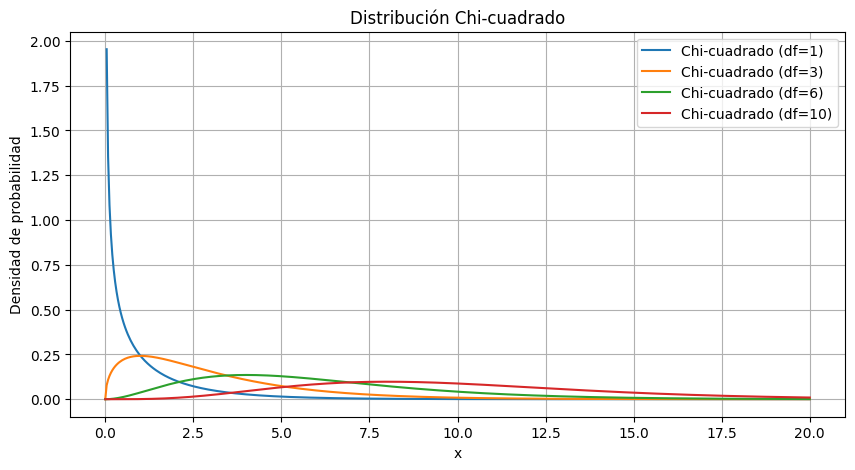

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Damos un rango de valores para las graficas
x_chi = np.linspace(0, 20, 500)

# Gráfica de la distribución Chi-cuadrado con diferentes grados de libertad
plt.figure(figsize=(10, 5))

df_chi_list = [1, 3, 6, 10] # Grados de libertad
for df in df_chi_list:
    plt.plot(x_chi, chi2.pdf(x_chi, df), label=f'Chi-cuadrado (df={df})')
plt.title('Distribución Chi-cuadrado')
plt.xlabel('x') # Etiqueta del eje x
plt.ylabel('Densidad de probabilidad') # Etiqueta del eje y
plt.legend()
plt.grid()
plt.show()

## Distribución $t$ de Student

Sean
- $X\sim N(0,1)$
- $Y \sim \chi^2(n-1)$
Entonces
$$ T = \frac{X\cdot \sqrt{n}}{\sqrt{\frac{Y}{n-1}}} \sim t(n-1)$$

Podemos decir que

$$ \lim_{n\to\infty}t(n) = N(0,1) $$

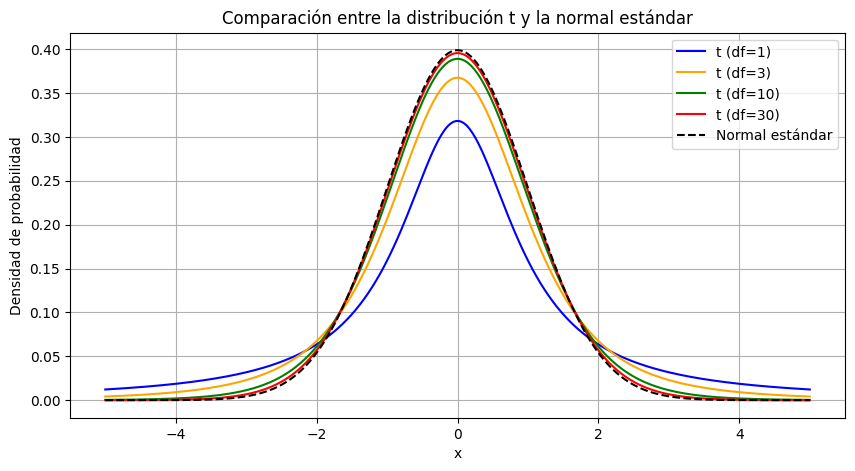

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, norm

# Damos un rango de valores para las graficas
x = np.linspace(-5, 5, 500)

dfs = [1,3,10,30]
colors = ['blue', 'orange', 'green', 'red']

plt.figure(figsize=(10, 5))

# Graficamos las distribuciones t de Student
for df, color in zip(dfs, colors): # asignar un color diferente a cada df
    plt.plot(x, t.pdf(x, df), label=f't (df={df})', color=color)

# Graficamos la distribución normal estándar
plt.plot(x, norm.pdf(x), 'k--', label='Normal estándar')

plt.title('Comparación entre la distribución t y la normal estándar')
plt.xlabel('x') # Etiqueta del eje x
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid() 
plt.show()


## Distribución D de Fisher
se aplica al caso en el que tenemos dos muestras aleatorias 

$$ F = \frac{chi^{2}_{\frac{(m-1)}{m-1}}}{chi^{2}_{\frac{(n-1)}{(n-1)}}}

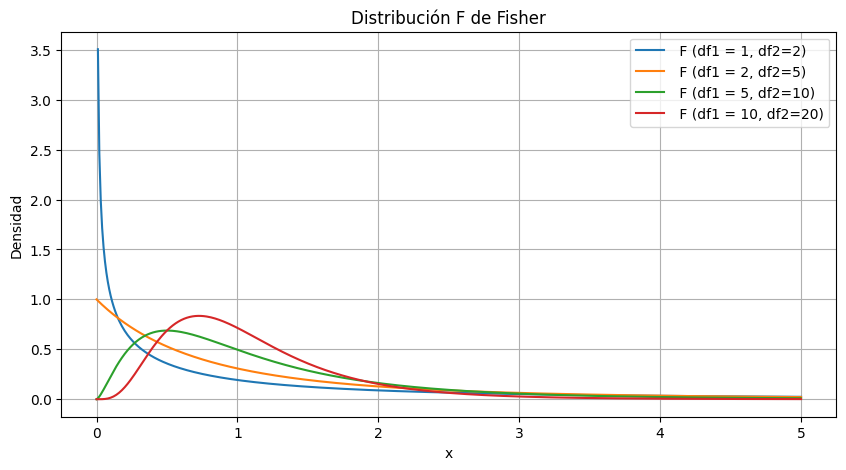

In [19]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import f 

#definimos un rango de valores 

x = np.linspace (0, 5 , 500)

#lista de grados de libertad

df_lista =  [(1,2),(2,5),(5,10),(10,20)] # (df1, df2)
plt.figure(figsize = (10, 5))

#Graficamos las distribuciones de F de Fisher 
for d1, d2 in df_lista:
    plt.plot(x, f.pdf(x, d1, d2), label = f' F (df1 = {d1}, df2={d2})')

plt.title('Distribución F de Fisher')
plt.xlabel('x') 
plt.ylabel('Densidad')
plt.legend()
plt.grid()
plt.show()

# Intervalos de Confianza

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

## Intervalo de Confianza para la media de una distribución normal (σ conocida)
Sea $X_1, \dots, X_n$ una m.a. $X_i \sim \mathcal{N}(\mu, \sigma^2)$. Entonces:
- $\bar{X} \sim \mathcal{N}(\mu, \frac{\sigma^2}{n})$
- $Z = \frac{\bar{X} - \mu}{\sigma / \sqrt{n}} \sim \mathcal{N}(0,1)$
### Nivel de significancia (error): $\alpha$
El intervalo de confianza se basa en que:
$$
\mathbb{P}\left( -z_{\alpha/2} < \frac{\bar{X} - \mu}{\sigma / \sqrt{n}} < z_{\alpha/2} \right)
= \mathbb{P}\left( \bar{X} - z_{\alpha/2} \frac{\sigma}{\sqrt{n}} < \mu < \bar{X} + z_{\alpha/2} \frac{\sigma}{\sqrt{n}} \right)
= 1 - \alpha
$$
### El intervalo del $(1 - \alpha) \cdot 100\%$ de confianza para $\mu$ (con $\sigma$ conocida) es:
$$
\left( \bar{X} - z_{\alpha/2} \frac{\sigma}{\sqrt{n}}, \quad \bar{X} + z_{\alpha/2} \frac{\sigma}{\sqrt{n}} \right)
$$
donde
- $\sigma$ es la desviación estándar
- $\frac{\sigma}{\sqrt{n}}$ es el error estándar de la media
- $z_{\alpha/2}$ determina el nivel de confianza
- el intervalo está centrado en $\bar{x}$

**OBS** A mayor valor de $n \rightarrow$ menor error estándar $\rightarrow$ el intervalo de confianza es más pequeño $\rightarrow$ lo cual hace que se acerque más a la media, es decir, que haya menos variación.

**EJEMPLO** Para trata de estimar la media de consumo por cliente es un restaurante, se reunieron datos de una muestra de $49$ clientes durante tres semanas
- **a)** Supongamos que la **desviacion estándar** de la población es de $\$2.5$. ¿Cuál es el error estandar de la media?

- **b)** Con un nivel de confianza del $95\%$, ¿Cuál es el margen de error?

- **c)** Si la media de la muestra es de $\$22.60$ ¿Cuál es el intervalo de confianza de $95\%$ para la media de la población?

In [21]:
# Datos:
n = 49
sigma = 2.5
media_muestral = 22.60
confianza = 0.95

# a) Error estándar de la media
error_estandar = sigma / np.sqrt(n)
print(f"Error estándar de la media: {error_estandar:.2f}")

# b) Margen de error
# 1-confianza = 0.05 => 0.025 en cada cola -> (1-confianza)/2

z = st.norm.ppf(1 - (1 - confianza) / 2) # ppf -> percentil point function

# z_{0.975}  es tal que P(Z <= z_{0.975}) = 0.975
margen_error = z * error_estandar
print(f"Margen de error: {margen_error:.2f}")

# C) Intervalo de confianza
Limite_inferior = media_muestral - margen_error
Limite_superior = media_muestral + margen_error
print(f"Intervalo de confianza del {confianza*100}%: ({Limite_inferior:.2f}, {Limite_superior:.2f})")

Error estándar de la media: 0.36
Margen de error: 0.70
Intervalo de confianza del 95.0%: (21.90, 23.30)


1 Por lo tanto, podemos decir con un $95\%$ de confianza, se estima que el **consumo medio poblacional** está entre $21.90$ y $23.30$

**Ejemplo 4** Los artículos de cerámica utilizados sobre velas electricas sobrecargadas se rompen con diferentes presiones. Supongamos que los datos provienen de una distribución normal.
La resistencia a la ruptura fue medida en una muestra de 100 artículos, y el promedio fue de $1750$ con un desviación estándar de 315.8
- **a)** Estimar con un nivel del confianza del $90\%$ a la media poblacional de la presión de la ruptura.
- **b)** Estimar con un nivel del confianza del $90\%$ a la varianza poblacional.

In [22]:
from scipy.stats import chi2
# Datos:
n = 100
media_muestral = 1750
desviacion_estandar = 315.8 # varianza muestral = 99,729.64
confianza = 0.90

# a) Se tiene que n>30, por lo que usamos la normal
error_estandar = desviacion_estandar / np.sqrt(n)
intervalo_media = st.norm.interval(confianza, loc=media_muestral, scale=error_estandar)
print(f"Intervalo de confianza del {confianza*100}% para la media: ({intervalo_media[0]:.2f}, {intervalo_media[1]:.2f})")

# b) Intervalos de confianza para la varianza
gl = n - 1
alpha = 1 - confianza
s2 = desviacion_estandar**2

# Vamos a calcular los cuantiles de la distribución chi-cuadrada

chi2_inf = st.chi2.ppf(alpha / 2, df=gl)
chi2_sup = st.chi2.ppf(1 - alpha / 2, df=gl)
intervalos_varianza = ((gl * s2) / chi2_sup, (gl * s2) / chi2_inf)
print(f"Intervalo de confianza del {confianza*100}% para la varianza: ({intervalos_varianza[0]:.2f}, {intervalos_varianza[1]:.2f})")

# Otra forma de calcular el intervalo de confianza para la varianza
chi2_inf, chi2_sup = chi2.interval(confianza, df=gl)
intervalos_varianza2 = ((gl * s2) / chi2_sup, (gl * s2) / chi2_inf)
print(f"Intervalo de confianza del {confianza*100}% para la varianza: ({intervalos_varianza2[0]:.2f}, {intervalos_varianza2[1]:.2f})")


Intervalo de confianza del 90.0% para la media: (1698.06, 1801.94)
Intervalo de confianza del 90.0% para la varianza: (80123.49, 128146.72)
Intervalo de confianza del 90.0% para la varianza: (80123.49, 128146.72)


**Ejercicio 1** En una encuesta de una Universidad, 225 estudiantes son seleccionados al azar de los que toman cálculo y se les pregunta si cálculo es su materia favorita. 100 estudiantes responden que el cálculo es su materia favorita. Proporcione un intervalo de confianza del 95 %  para la proporción de todos los estudiantes que toman cálculo y que la consideran su materia favorita.

In [23]:
import numpy as np
import scipy.stats as st
n1 = 225
x1 = 100
p_hat = x1 / n1
z_95 = st.norm.ppf(0.975)

se1 = np.sqrt(p_hat * (1 - p_hat) / n1)
ic1 = (round(p_hat - z_95 * se1,4), round(p_hat + z_95 * se1,4))
print("Intervalo de confianza al 95% para la proporción:", ic1)

Intervalo de confianza al 95% para la proporción: (np.float64(0.3795), np.float64(0.5094))


**Ejercicio 2** Los datos $1.2,\ 2.1,\ 2.3,\ 1.9,\ 3.0,\ 1.5,\ 2.8,\ 2.4,\ 1.7,\ 2.6,\ 2.0,\ 1.8,\ 3.1,\ 2.2,\ 2.5$ se toman a partir de una distribución normal $N(\mu,\sigma^2)$ con $\mu$ desconocida.

**a)** Encuentra un intervalo de confianza al nivel de $90\%$ para $\mu$, dado que $\sigma =2$.

**b)** Encuentra un intervalo de confianza al nivel de $90\%$ para $\mu$.

**c)** Encuentra un intervalo de confianza al nivel de $90\%$ para $\sigma^2$.

In [24]:
data2 = np.array([1.2, 2.1, 2.3, 1.9, 3.0, 1.5, 2.8, 2.4, 1.7, 
                  2.6, 2.0, 1.8, 3.1, 2.2, 2.5])
n2 = len(data2)
mean2 = np.mean(data2)
s2 = np.std(data2, ddof=1)

# a) sigma conocida (σ=2), nivel 90%
sigma = 2
z_90 = st.norm.ppf(0.95)
se_known = sigma / np.sqrt(n2)
ic2a = (round(mean2 - z_90 * se_known,4), round(mean2 + z_90 * se_known,4))

# b) sigma desconocida, usamos t
t_90 = st.t.ppf(0.95, df=n2-1)
se_unknown = s2 / np.sqrt(n2)
ic2b = (round(mean2 - t_90 * se_unknown,4), round(mean2 + t_90 * se_unknown,4))

# c) IC para varianza
alpha = 0.10
df = n2 - 1
chi2_low = st.chi2.ppf(alpha/2, df)
chi2_high = st.chi2.ppf(1 - alpha/2, df)
lower_var = (df * s2**2) / chi2_high
upper_var = (df * s2**2) / chi2_low
ic2c = (round(lower_var,4), round(upper_var,4))


print("a) Intervalo de confianza al 90% para μ (σ=2):", ic2a)
print("b) Intervalo de confianza al 90% para μ (σ desconocida):", ic2b)
print("c) Intervalo de confianza al 90% para σ²:", ic2c)

a) Intervalo de confianza al 90% para μ (σ=2): (np.float64(1.3573), np.float64(3.0561))
b) Intervalo de confianza al 90% para μ (σ desconocida): (np.float64(1.9591), np.float64(2.4542))
c) Intervalo de confianza al 90% para σ²: (np.float64(0.1752), np.float64(0.6315))


**Ejercicio 3** Los ingresos semanales promedio de las personas que trabajan en varias industrias aparecieron en el *The New York Times 1988 Almanac*.  
Esos ingresos para quienes trabajan en los servicios fueron de $\$369$. Suponga que este resultado se basó en una muestra de 250 personas dedicadas a los servicios y que la desviación estándar de la muestra fue de $\$50$. Calcula el intervalo de confianza del 95% para la media de la población de ingresos semanales de personas que trabajan en los servicios.

In [25]:
import numpy as np
from scipy.stats import norm
import math

x_bar = 369       # media muestral
s = 50            # desviación estándar muestral
n = 250           # tamaño de muestra
alpha = 0.05      # 95% confianza

# Calculamos  el valor crítico z
z = norm.ppf(1 - alpha/2)

# Calculamos el  error estándar
EE = s / math.sqrt(n)

# Calculamos el  margen de error
ME = z * EE

# Calculamos el  intervalo de confianza
IC_inf = x_bar - ME
IC_sup = x_bar + ME

print(f"Valor crítico z: {z:.4f}")
print(f"Error estándar: {EE:.4f}")
print(f"Margen de error: {ME:.4f}")
print(f"Intervalo de confianza 95%: ({IC_inf:.2f}, {IC_sup:.2f})")


Valor crítico z: 1.9600
Error estándar: 3.1623
Margen de error: 6.1980
Intervalo de confianza 95%: (362.80, 375.20)


**Ejercicio 4** En un estudio de préstamos a estudiantes, el Departamento de Educación informó que los beneficiarios del fondo Stafford Loan deberían un promedio de \$12,658 al recibirse (*USA Today*, 5 de abril de 1995). Suponga que este promedio de deuda se basa en una muestra de 480 préstamos a estudiantes y que la desviación estándar de la población de las deudas al recibirse es \$2,000.

In [26]:
xbar4 = 12658
n4 = 480
sigma4 = 2000
se4 = sigma4 / np.sqrt(n4)

z_90 = st.norm.ppf(0.95)
z_95 = st.norm.ppf(0.975)
z_99 = st.norm.ppf(0.995)

ic4_90 = (round(xbar4 - z_90 * se4,4), round(xbar4 + z_90 * se4,4))
ic4_95 = (round(xbar4 - z_95 * se4,4), round(xbar4 + z_95 * se4,4))
ic4_99 = (round(xbar4 - z_99 * se4,4), round(xbar4 + z_99 * se4,4))

print("a) Intervalo de confianza al 90%:", ic4_90)
print("b) Intervalo de confianza al 95%:", ic4_95)
print("c) Intervalo de confianza al 99%:", ic4_99)
print("d) A mayor nivel de confianza, el intervalo es más ancho.")

a) Intervalo de confianza al 90%: (np.float64(12507.8461), np.float64(12808.1539))
b) Intervalo de confianza al 95%: (np.float64(12479.0806), np.float64(12836.9194))
c) Intervalo de confianza al 99%: (np.float64(12422.86), np.float64(12893.14))
d) A mayor nivel de confianza, el intervalo es más ancho.


**Ejercicio 5** La encuesta anual de calidad de automóviles, efectuada por *J. D. Power & Associates*, determinó que la cantidad promedio de defectos, en todas las marcas, por cada vehículo nuevo es **1.07**  (*The Wall Street Journal*, 27 de enero de 1994). Suponga que se toma una muestra de **30 automóviles nuevos** de determinada marca y se obtienen las siguientes cantidades de defectos por vehículo:
$$ 0, 1, 1, 2, 1, 0, 2, 3, 2, 1, 0, 2, 0, 0, 2, 3, 0, 4, 3, 1, 1, 1, 0, 2, 0, 2, 0, 3, 1, 0 $$

**a)** ¿Cuál es el promedio muestral de la cantidad de defectos por vehículo?

**b)** ¿Cuál es la desviación estándar de la muestra?
**c)** Determine un intervalo de confianza del 95% para la **media de defectos** por vehículo de esta marca.

**d)** Un analista sugirió que se debería **revisar una muestra mayor** antes de comparar con el promedio general de J.D. Power (1.07). ¿Respalda usted esta idea? ¿Por qué?

In [27]:
import numpy as np
import math
from scipy.stats import t


datos = np.array([0, 1, 1, 2, 1, 0, 2, 3, 2, 1, 0, 2, 0, 0, 2, 3, 0, 4, 3, 1, 1, 1, 0, 2, 0, 2, 0, 3, 1, 0])
n = len(datos)

# a) Promedio muestral
x_bar = np.mean(datos)

# b) Desviación estándar muestral
s = np.std(datos, ddof=1)

# c) Intervalo de confianza 95% con t-Student
alpha = 0.05
gl = n - 1
t_crit = t.ppf(1 - alpha/2, df=gl)
EE = s / math.sqrt(n)
ME = t_crit * EE
IC_inf = x_bar - ME
IC_sup = x_bar + ME

print(f"a) Promedio muestral: {x_bar:.4f}")
print(f"b) Desviación estándar muestral: {s:.4f}")
print(f"c) Intervalo de confianza 95%: ({IC_inf:.4f}, {IC_sup:.4f})")

# d) Interpretación
if IC_inf <= 1.07 <= IC_sup:
    print("d) El valor 1.07 está dentro del intervalo de confianza. ")
else:
    print("d) El valor 1.07 NO está dentro del intervalo de confianza.")


a) Promedio muestral: 1.2667
b) Desviación estándar muestral: 1.1725
c) Intervalo de confianza 95%: (0.8289, 1.7045)
d) El valor 1.07 está dentro del intervalo de confianza. 


**Referencia**

Mendenhall, W., Beaver, R. J., & Beaver, B. M. (2013). *Introduction to probability and statistics* (14.ª ed.). Cengage Learning.
